In [4]:
!git clone https://github.com/misbah4064/facial_expressions.git


fatal: destination path 'facial_expressions' already exists and is not an empty directory.


**Creating necessary directories**
> Happy , Angry , Neutral, Sad, Surprise

In [6]:
%cd facial_expressions/
%mkdir -p data_set/{anger,happy,neutral,sad,surprise}

/content/facial_expressions


**Extracting Images with expressions**

In [12]:
import cv2
with open('happy.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/happy/"+image,loadedImage)
print("done writing")

################################################

import cv2
with open('anger.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/anger/"+image,loadedImage)
print("done writing")

################################################

import cv2
with open('neutral.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/neutral/"+image,loadedImage)
print("done writing")

################################################

import cv2
with open('sad.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/sad/"+image,loadedImage)
print("done writing")

################################################

import cv2
with open('surprise.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/surprise/"+image,loadedImage)
print("done writing")

done writing
done writing
done writing
done writing
done writing


In [13]:
%mkdir dataset

**Move the photos to Dataset with the face only Without any Background**

In [15]:
import cv2

with open('anger.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 0
count = 0

for image in images:
    img = cv2.imread("data_set/anger/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data 'anger' ")

##########################################
with open('happy.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 1

count = 0

for image in images:
    img = cv2.imread("data_set/happy/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data 'happy' ")

##########################################
with open('neutral.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 2

count = 0

for image in images:
    img = cv2.imread("data_set/neutral/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data 'neutral' ")

##########################################
with open('sad.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 3

count = 0

for image in images:
    img = cv2.imread("data_set/sad/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data 'sad' ")

##########################################
with open('surprise.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 4

count = 0

for image in images:
    img = cv2.imread("data_set/surprise/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data 'surprise' ")


 Done creating face data 'anger' 

 Done creating face data 'happy' 

 Done creating face data 'neutral' 

 Done creating face data 'sad' 

 Done creating face data 'surprise' 


**Training our Model on Images**

In [16]:
%mkdir trainer

In [17]:
import cv2
import numpy as np
from PIL import Image
import os

path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L')
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

recognizer.write('trainer/trainer.yml')

print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] Training faces....

 [INFO] 5 Emotions trained. Exiting Program



**Now The final Step is Testing our model**


In [44]:
import cv2
import numpy as np
import os

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0

names = ['Anger', 'Happy', 'netural', 'sad', 'Surprise', 'None']

img = cv2.imread("dwayne.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])


    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))

    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)

cv2.imwrite("dwayne_johnson.jpg",img)

print("\n [INFO] Done detecting and Image is saved")



 [INFO] Done detecting and Image is saved


>
**Now Display the Photo**

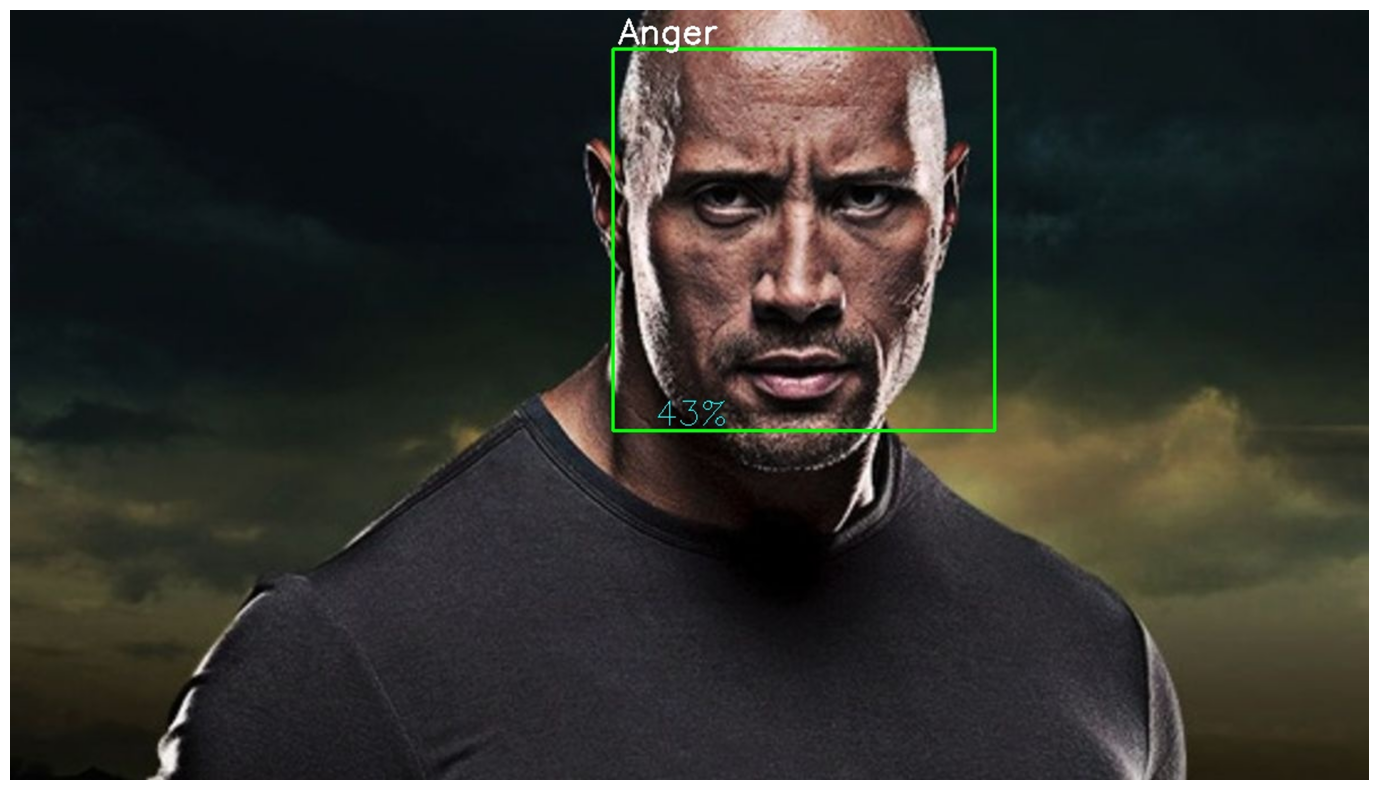

In [43]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("dwayne_johnson.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()